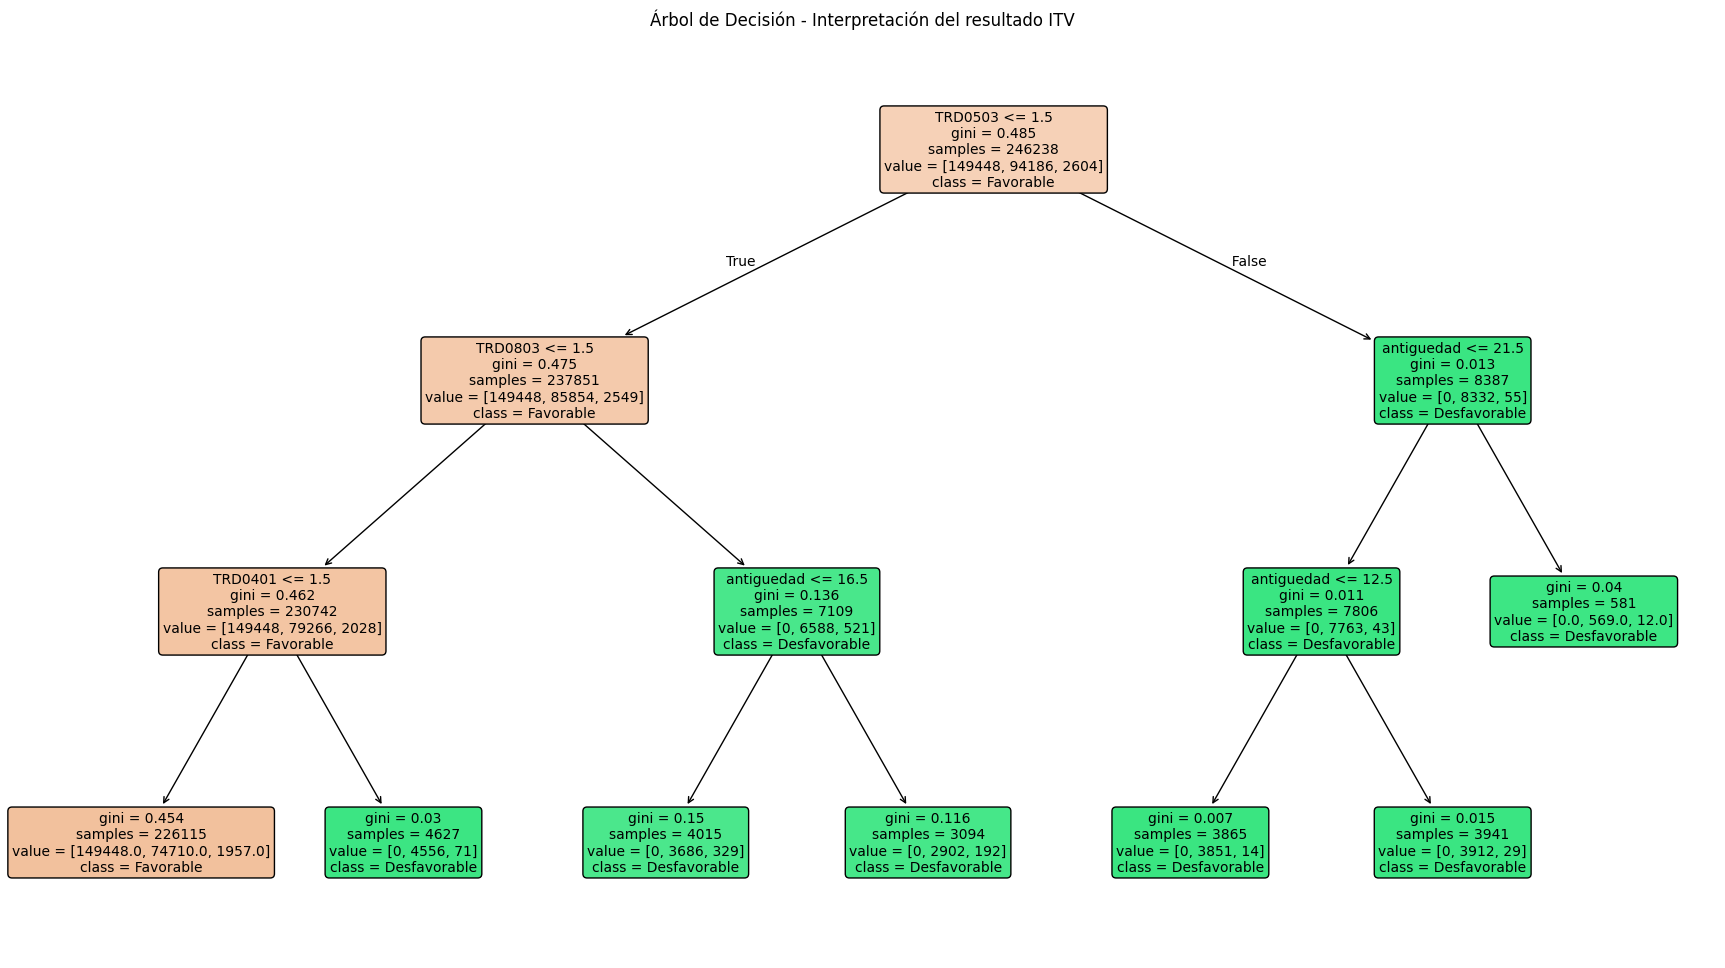

Accuracy del √°rbol de decisi√≥n: 0.6849740090968162

 Informe de clasificaci√≥n:
              precision    recall  f1-score   support

   Favorable       0.66      1.00      0.80     37362
Desfavorable       0.97      0.20      0.34     23547
    Negativa       0.00      0.00      0.00       651

    accuracy                           0.68     61560
   macro avg       0.54      0.40      0.38     61560
weighted avg       0.77      0.68      0.61     61560



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


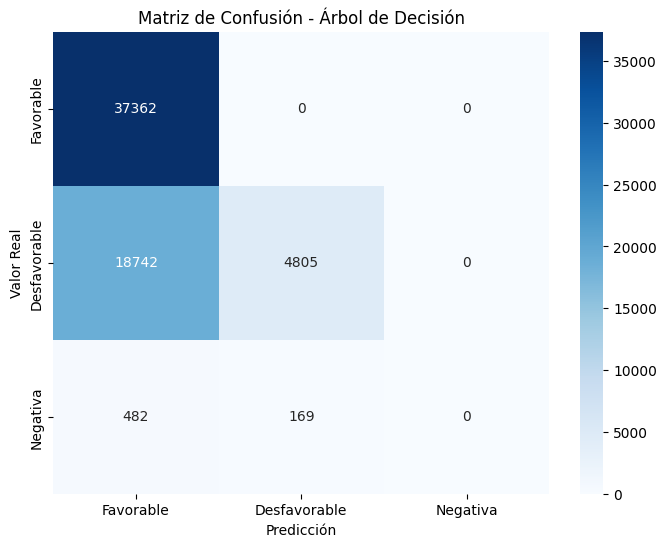

In [2]:
# BLOQUE 1 ‚Äì √Årbol de Decisi√≥n Exploratorio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')

# Separar la variable objetivo (target) y las predictoras
X = df.drop(columns=['target'])
y = df['target']

# Divisi√≥n del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Crear y entrenar √°rbol de decisi√≥n simplificado
tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=500,
    min_samples_leaf=250,
    random_state=42
)
tree.fit(X_train, y_train)

# Visualizar el √°rbol
labels = ['Favorable', 'Desfavorable', 'Negativa']

plt.figure(figsize=(22, 12))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=labels,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("√Årbol de Decisi√≥n - Interpretaci√≥n del resultado ITV")
plt.show()

y_pred = tree.predict(X_test)

print("Accuracy del √°rbol de decisi√≥n:", accuracy_score(y_test, y_pred))
print("\n Informe de clasificaci√≥n:")
print(classification_report(y_test, y_pred, target_names=labels))

# 7. Matriz de confusi√≥n con etiquetas de clase
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusi√≥n - √Årbol de Decisi√≥n")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.show()

üîç Accuracy del modelo Random Forest: 0.8350227420402859

üîç Informe de clasificaci√≥n:
              precision    recall  f1-score   support

   Favorable       0.80      0.98      0.88     37362
Desfavorable       0.93      0.62      0.75     23547
    Negativa       0.18      0.03      0.05       651

    accuracy                           0.84     61560
   macro avg       0.64      0.54      0.56     61560
weighted avg       0.85      0.84      0.82     61560



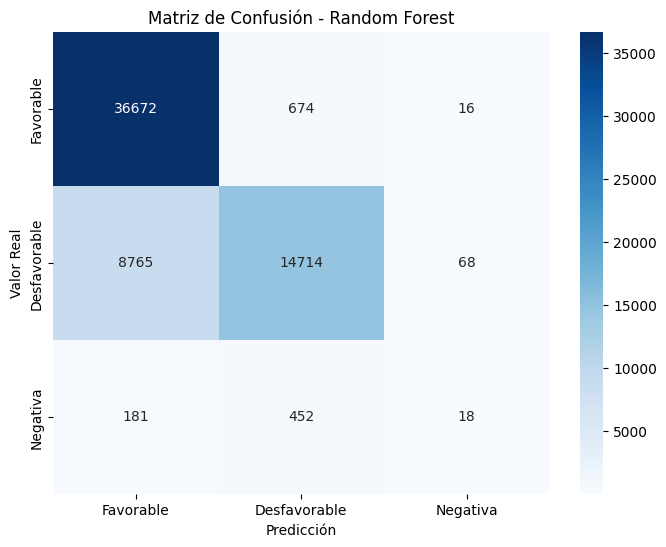

<ipython-input-8-112181489>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_sorted.values, y=importances_sorted.index, palette='viridis')


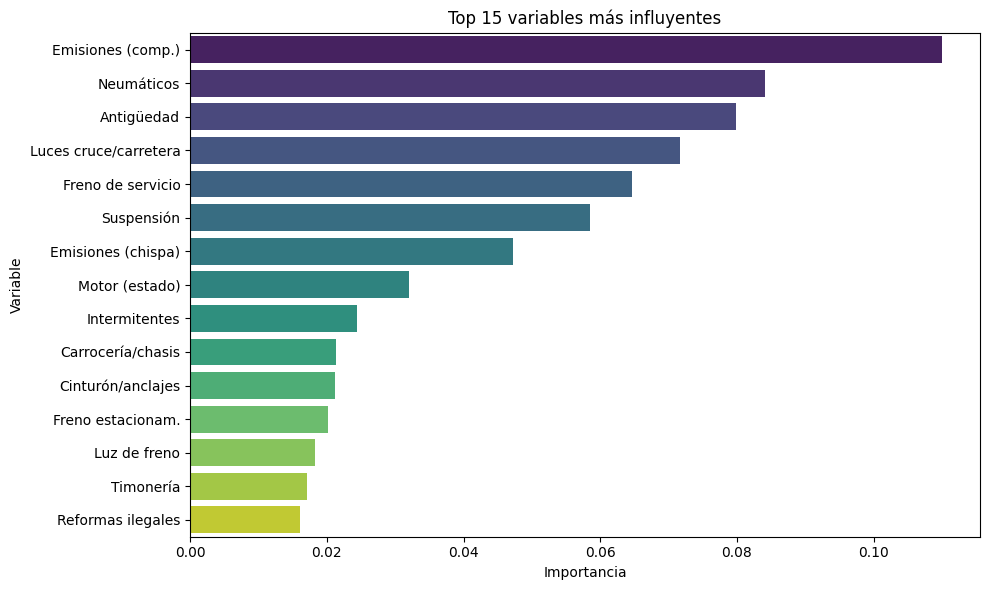

In [8]:
# BLOQUE 2 ‚Äì Modelo Random Forest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')

# Renombrar la columna antiguedad si existe
if 'antiguedad' in df.columns:
    df = df.rename(columns={'antiguedad': 'antig√ºedad'})

# Dividir variables predictoras y la variable objetivo
X = df.drop(columns=['target'])
y = df['target']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar rendimiento
y_pred = rf_model.predict(X_test)

print(" Accuracy del modelo Random Forest:", accuracy_score(y_test, y_pred))


target_names = ['Favorable', 'Desfavorable', 'Negativa']

print("\n Informe de clasificaci√≥n:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Matriz de Confusi√≥n - Random Forest")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.show()


nombre_variables = {
    'antig√ºedad': 'Antig√ºedad',
    'TRD0101': 'Doc. incompleta', 'TRD0102': 'N¬∫ bastidor', 'TRD0103': 'Placas matr√≠cula',
    'TRD0201': 'Antie. delantero', 'TRD0202': 'Carrocer√≠a/chasis', 'TRD0203': 'Acoplamiento',
    'TRD0204': 'Guardabarros', 'TRD0205': 'Limpia/lava', 'TRD0206': 'Protecci√≥n lateral',
    'TRD0207': 'Protecci√≥n trasera', 'TRD0208': 'Puertas/pelda√±os', 'TRD0209': 'Retrovisores',
    'TRD0210': 'Se√±ales veh√≠culo', 'TRD0211': 'Soporte rueda ext.', 'TRD0212': 'Vidrios seguridad',
    'TRD0213': 'Elem. M2/M3 (ext.)', 'TRD0301': 'Asientos/anclajes', 'TRD0302': 'Cintur√≥n/anclajes',
    'TRF0303': 'Silla infantil', 'TRD0304': 'Antihielo/vaho', 'TRD0305': 'Antirrobo/alarma',
    'TRD0306': 'Visibilidad', 'TRD0307': 'Ret. de carga', 'TRD0308': 'Veloc√≠metro',
    'TRD0309': 'Salientes interiores', 'TRD0310': 'Elem. M2/M3 (int.)',
    'TRD0401': 'Luces cruce/carretera', 'TRD0402': 'Luz marcha atr√°s', 'TRD0403': 'Intermitentes',
    'TRD0404': 'Luz emergencia', 'TRD0405': 'Luz de freno', 'TRD0406': 'Luz matr√≠cula',
    'TRD0407': 'Luces posici√≥n', 'TRD0408': 'Antiniebla', 'TRD0409': 'Luz g√°libo',
    'TRD0410': 'Catadi√≥ptricos', 'TRD0411': 'Alumbrado interior', 'TRD0412': 'Claxon',
    'TRD0413': 'Luz estacionamiento', 'TRD0414': 'Se√±al puertas', 'TRD0415': 'Se√±al lum. espec√≠fica',
    'TRD0416': 'Luz diurna', 'TRD0501': 'Ruido', 'TRD0502': 'Emisiones (chispa)',
    'TRD0503': 'Emisiones (comp.)', 'TRD0601': 'Freno de servicio', 'TRD0602': 'Freno secundario',
    'TRD0603': 'Freno estacionam.', 'TRD0604': 'Freno inercia', 'TRD0605': 'ABS',
    'TRD0606': 'Desacelerador', 'TRD0607': 'Pedal freno', 'TRD0608': 'Bomba/dep√≥sito',
    'TRD0609': 'Presi√≥n baja', 'TRD0610': 'V√°lvula freno mano', 'TRD0611': 'V√°lvulas frenado',
    'TRD0612': 'Acumulador', 'TRD0613': 'Frenos remolque', 'TRD0614': 'Servofreno',
    'TRD0615': 'Tubos r√≠gidos', 'TRD0616': 'Tubos flexibles', 'TRD0617': 'Forros freno',
    'TRD0618': 'Tambores/discos', 'TRD0619': 'Conexiones freno', 'TRD0620': 'Cilindros freno',
    'TRD0621': 'V√°lvula carga', 'TRD0622': 'Ajuste autom√°tico', 'TRD0701': 'Desv. ruedas',
    'TRD0702': 'Volante/columna', 'TRD0703': 'Caja direcci√≥n', 'TRD0704': 'Timoner√≠a',
    'TRD0705': 'Servodirecci√≥n', 'TRD0801': 'Ejes', 'TRD0802': 'Ruedas',
    'TRD0803': 'Neum√°ticos', 'TRD0804': 'Suspensi√≥n', 'TRD0901': 'Motor (estado)',
    'TRD0902': 'Sistema alimentaci√≥n', 'TRD0903': 'Escape', 'TRD0904': 'Transmisi√≥n',
    'TRD0905': 'Gas carburante', 'TRD1001': 'Mercanc√≠as peligrosas', 'TRD1002': 'Perecederos',
    'TRD1003': 'Escolares', 'TRD1004': 'Tac√≥grafo', 'TRD1005': 'Limitador vel.',
    'TRD1006': 'Reformas ilegales'
}

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_named = importances.rename(index=nombre_variables)
importances_sorted = importances_named.sort_values(ascending=False).head(15)

# Gr√°fico
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted.values, y=importances_sorted.index, palette='viridis')
plt.title("Top 15 variables m√°s influyentes")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


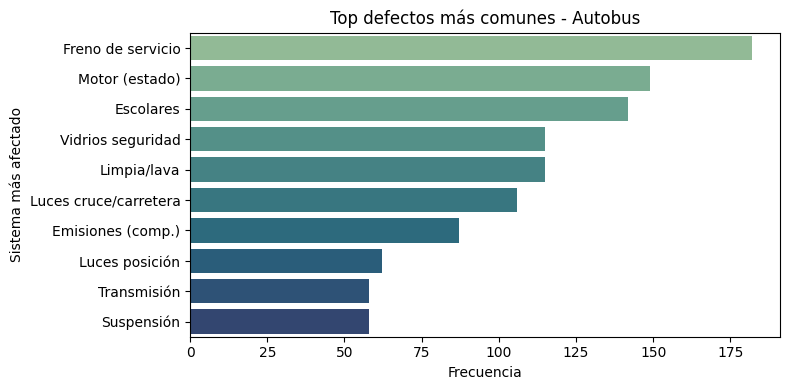

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


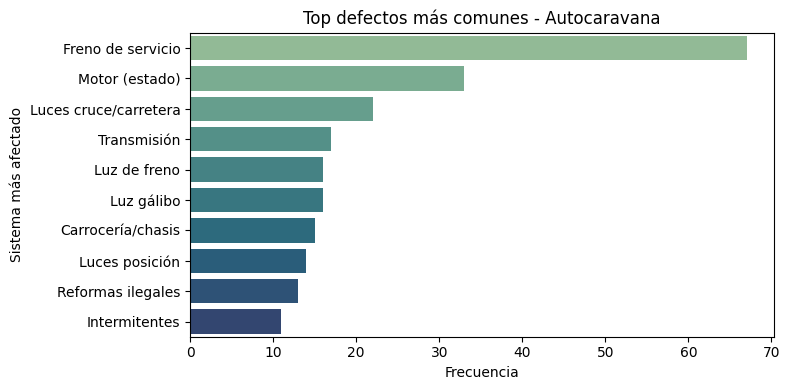

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


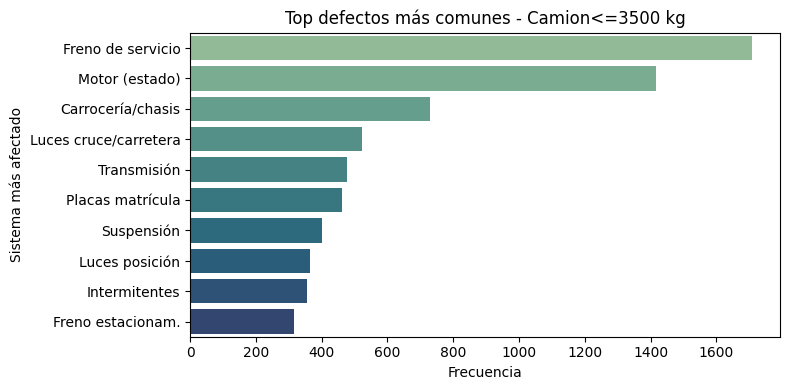

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


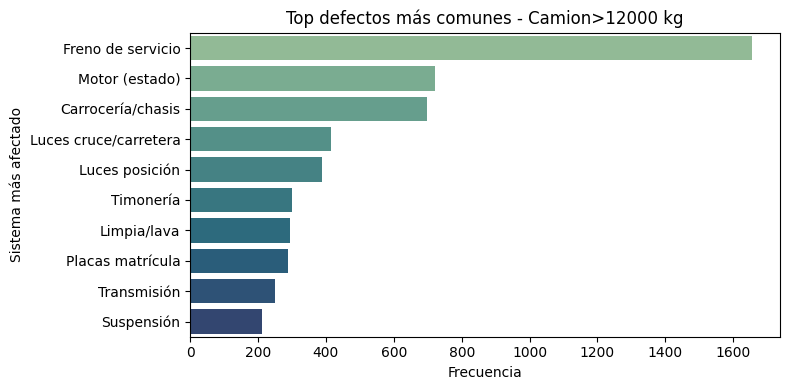

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


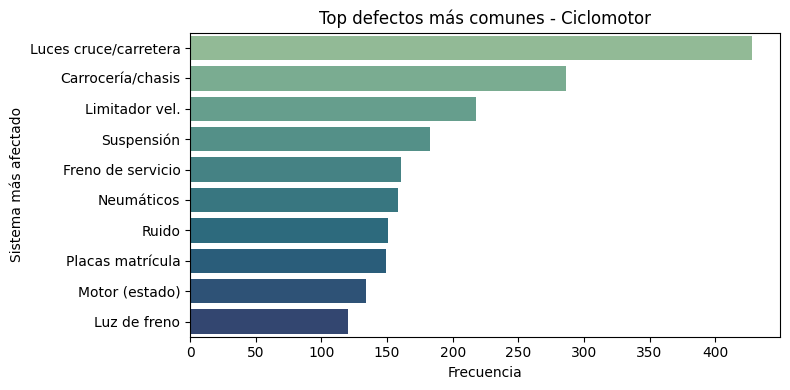

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


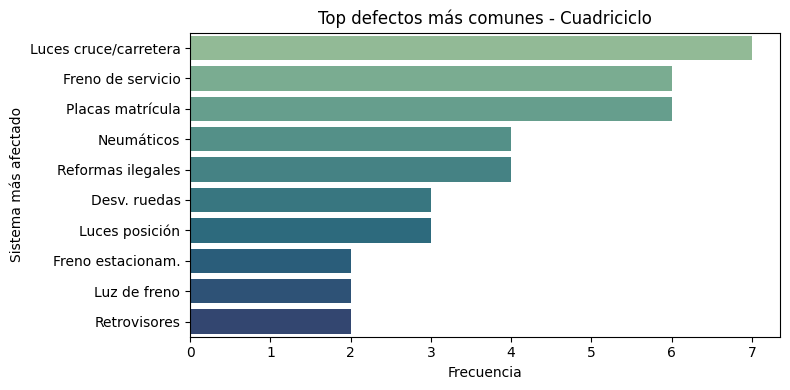

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


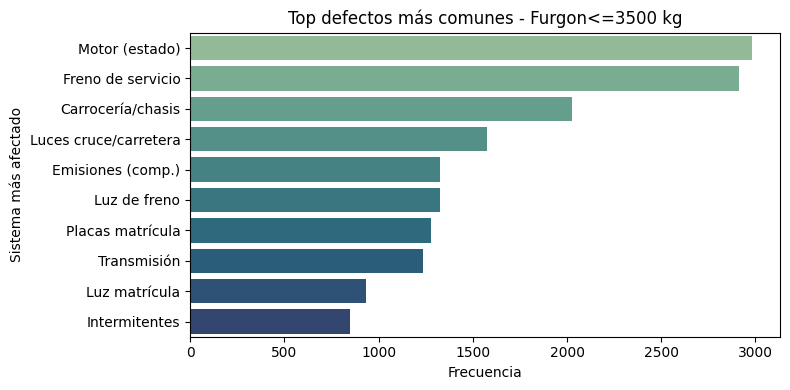

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


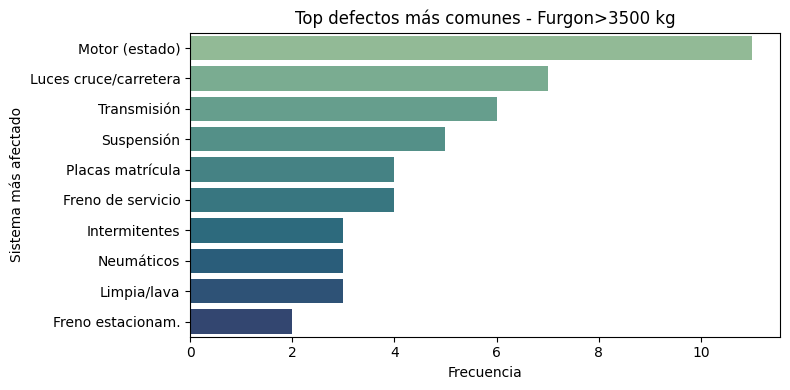

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


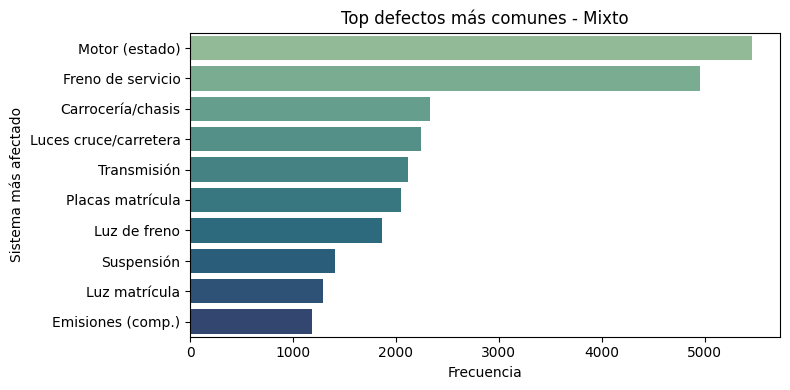

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


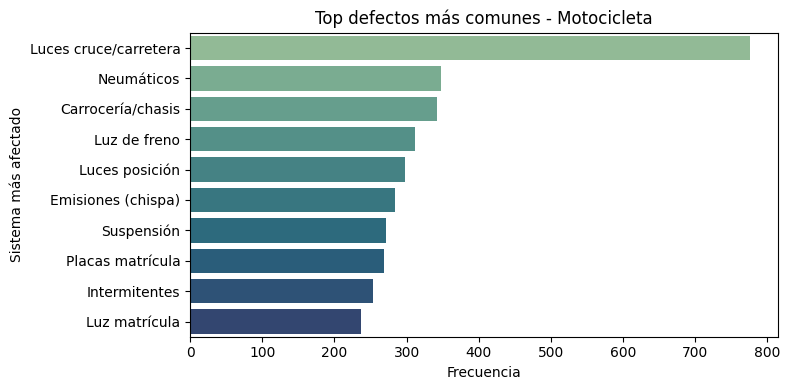

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


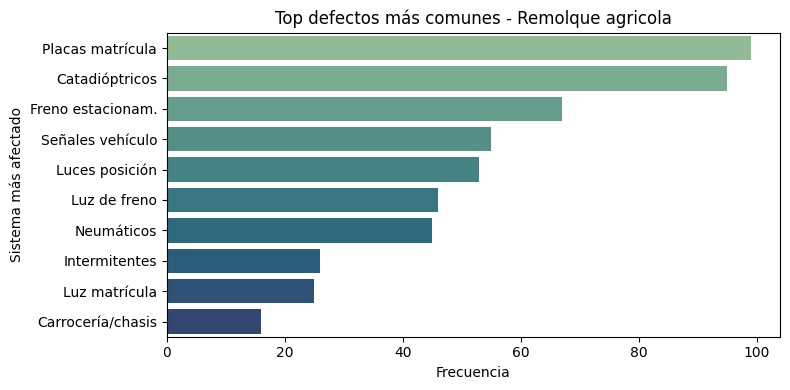

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


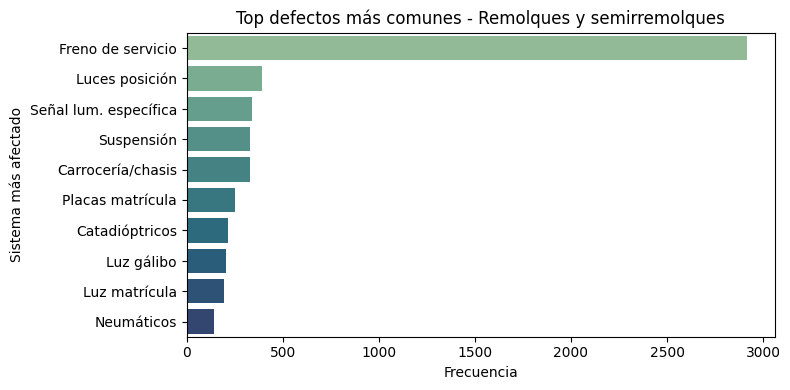

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


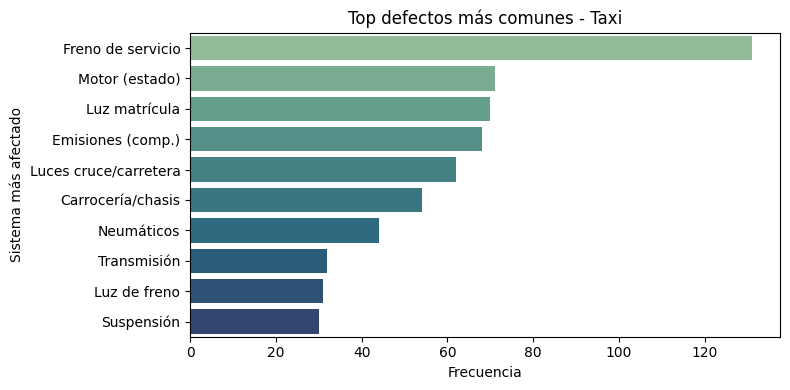

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


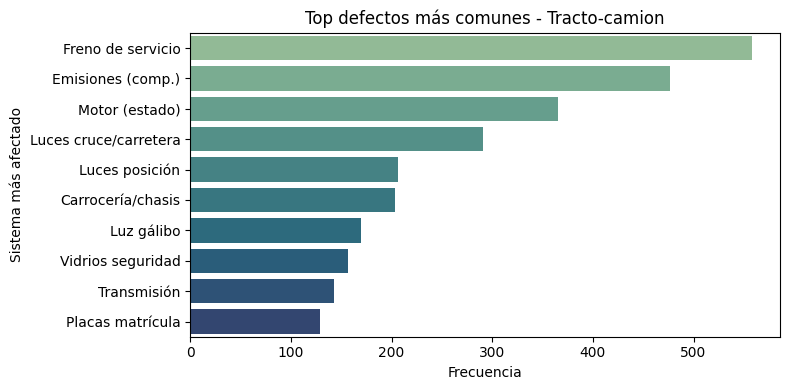

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


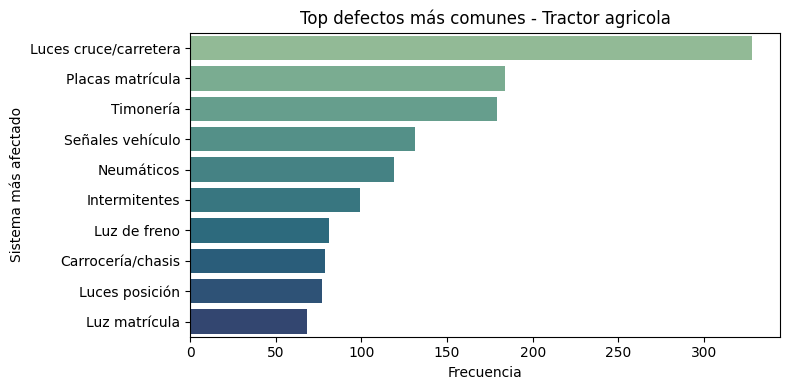

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


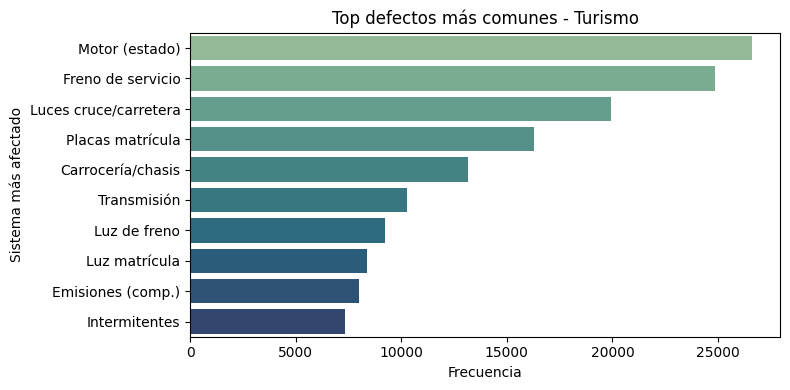

<ipython-input-11-731021095>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette='crest')


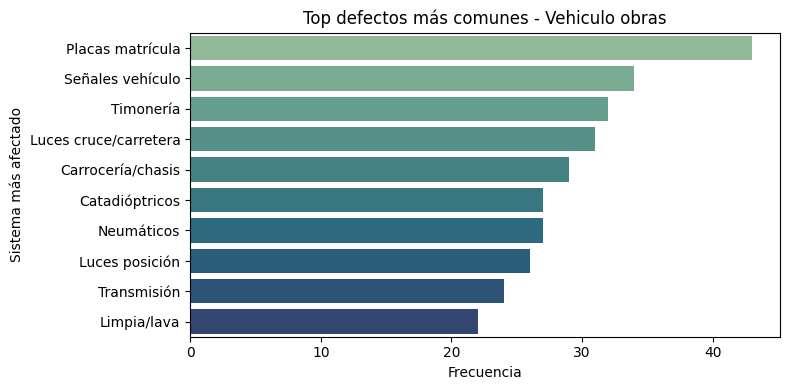

col_0                    AUTOBUS  AUTOCARAVANA  CAMION<=3500 KG  \
sistema_fallo_principal                                           
ABS                           21             0               10   
Acoplamiento                  11             2               24   
Acumulador                     0             0                0   
Ajuste autom√°tico              0             0                0   
Alumbrado interior             5             0                0   
...                          ...           ...              ...   
Visibilidad                    0             0                0   
Volante/columna                5             0               20   
V√°lvula carga                  3             0                7   
V√°lvula freno mano             0             0                0   
V√°lvulas frenado              41             0                0   

col_0                    CAMION>12000 KG  CICLOMOTOR  CUADRICICLO  \
sistema_fallo_principal                                             
ABS                                   24           0            0   
Acoplamiento                           9           0            0   
Acumulador                            13           0            0   
Ajuste autom√°tico                      0           0            0   
Alumbrado interior                     0           0            0   
...                                  ...         ...          ...   
Visibilidad                            0           0            0   
Volante/columna                       14          52            1   
V√°lvula carga                          3           0            0   
V√°lvula freno mano                     1           0            0   
V√°lvulas frenado                     136           0            0   

col_0                    FURGON<=3500 KG  FURGON>3500 KG  MIXTO  MOTOCICLETA  \
sistema_fallo_principal                                                        
ABS                                   33               0     30            6   
Acoplamiento                          35               0     68            0   
Acumulador                             0               0      0            0   
Ajuste autom√°tico                      0               0      0            0   
Alumbrado interior                     0               0      0            0   
...                                  ...             ...    ...          ...   
Visibilidad                            0               0      7            2   
Volante/columna                       54               0     74           62   
V√°lvula carga                          8               0      9            0   
V√°lvula freno mano                     0               0      0            0   
V√°lvulas frenado                       0               1      0            0   

col_0                    REMOLQUE AGRICOLA  REMOLQUES Y SEMIRREMOLQUES  TAXI  \
sistema_fallo_principal                                                        
ABS                                      0                          60     0   
Acoplamiento                             1                          10     1   
Acumulador                               0                           7     0   
Ajuste autom√°tico                        0                           2     0   
Alumbrado interior                       0                           0     1   
...                                    ...                         ...   ...   
Visibilidad                              0                           0     0   
Volante/columna                          0                           0     0   
V√°lvula carga                            0                           1     0   
V√°lvula freno mano                       0                           2     0   
V√°lvulas frenado                         0                          36     0   

col_0                    TRACTO-CAMION  TRACTOR AGRICOLA  TURISMO  \
sistema_fallo_principal                                        

Chi-cuadrado: 148158.10, p-valor: 0.0000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('/content/dataset_vehiculos_limpio.csv')

nombre_fallos = {
    'TRD0101': 'Doc. incompleta', 'TRD0102': 'N¬∫ bastidor', 'TRD0103': 'Placas matr√≠cula',
    'TRD0201': 'Antie. delantero', 'TRD0202': 'Carrocer√≠a/chasis', 'TRD0203': 'Acoplamiento',
    'TRD0204': 'Guardabarros', 'TRD0205': 'Limpia/lava', 'TRD0206': 'Protecci√≥n lateral',
    'TRD0207': 'Protecci√≥n trasera', 'TRD0208': 'Puertas/pelda√±os', 'TRD0209': 'Retrovisores',
    'TRD0210': 'Se√±ales veh√≠culo', 'TRD0211': 'Soporte rueda ext.', 'TRD0212': 'Vidrios seguridad',
    'TRD0213': 'Elem. M2/M3 (ext.)', 'TRD0301': 'Asientos/anclajes', 'TRD0302': 'Cintur√≥n/anclajes',
    'TRF0303': 'Silla infantil', 'TRD0304': 'Antihielo/vaho', 'TRD0305': 'Antirrobo/alarma',
    'TRD0306': 'Visibilidad', 'TRD0307': 'Ret. de carga', 'TRD0308': 'Veloc√≠metro',
    'TRD0309': 'Salientes interiores', 'TRD0310': 'Elem. M2/M3 (int.)',
    'TRD0401': 'Luces cruce/carretera', 'TRD0402': 'Luz marcha atr√°s', 'TRD0403': 'Intermitentes',
    'TRD0404': 'Luz emergencia', 'TRD0405': 'Luz de freno', 'TRD0406': 'Luz matr√≠cula',
    'TRD0407': 'Luces posici√≥n', 'TRD0408': 'Antiniebla', 'TRD0409': 'Luz g√°libo',
    'TRD0410': 'Catadi√≥ptricos', 'TRD0411': 'Alumbrado interior', 'TRD0412': 'Claxon',
    'TRD0413': 'Luz estacionamiento', 'TRD0414': 'Se√±al puertas', 'TRD0415': 'Se√±al lum. espec√≠fica',
    'TRD0416': 'Luz diurna', 'TRD0501': 'Ruido', 'TRD0502': 'Emisiones (chispa)',
    'TRD0503': 'Emisiones (comp.)', 'TRD0601': 'Freno de servicio', 'TRD0602': 'Freno secundario',
    'TRD0603': 'Freno estacionam.', 'TRD0604': 'Freno inercia', 'TRD0605': 'ABS',
    'TRD0606': 'Desacelerador', 'TRD0607': 'Pedal freno', 'TRD0608': 'Bomba/dep√≥sito',
    'TRD0609': 'Presi√≥n baja', 'TRD0610': 'V√°lvula freno mano', 'TRD0611': 'V√°lvulas frenado',
    'TRD0612': 'Acumulador', 'TRD0613': 'Frenos remolque', 'TRD0614': 'Servofreno',
    'TRD0615': 'Tubos r√≠gidos', 'TRD0616': 'Tubos flexibles', 'TRD0617': 'Forros freno',
    'TRD0618': 'Tambores/discos', 'TRD0619': 'Conexiones freno', 'TRD0620': 'Cilindros freno',
    'TRD0621': 'V√°lvula carga', 'TRD0622': 'Ajuste autom√°tico', 'TRD0701': 'Desv. ruedas',
    'TRD0702': 'Volante/columna', 'TRD0703': 'Caja direcci√≥n', 'TRD0704': 'Timoner√≠a',
    'TRD0705': 'Servodirecci√≥n', 'TRD0801': 'Ejes', 'TRD0802': 'Ruedas',
    'TRD0803': 'Neum√°ticos', 'TRD0804': 'Suspensi√≥n', 'TRD0901': 'Motor (estado)',
    'TRD0902': 'Sistema alimentaci√≥n', 'TRD0903': 'Escape', 'TRD0904': 'Transmisi√≥n',
    'TRD0905': 'Gas carburante', 'TRD1001': 'Mercanc√≠as peligrosas', 'TRD1002': 'Perecederos',
    'TRD1003': 'Escolares', 'TRD1004': 'Tac√≥grafo', 'TRD1005': 'Limitador vel.',
    'TRD1006': 'Reformas ilegales'
}

tipo_cols = [col for col in df.columns if col.startswith('TRVTIPVE_')]

trd_cols = [col for col in df.columns if col.startswith('TRD')]

def obtener_defecto_principal(row):
    valores = row[trd_cols]
    max_val = valores.max()
    if max_val == 0:
        return 'Sin defectos'
    else:
        col_max = valores[valores == max_val].index[0]
        return nombre_fallos.get(col_max, col_max)

df['sistema_fallo_principal'] = df.apply(obtener_defecto_principal, axis=1)


for tipo in tipo_cols:
    tipo_nombre = tipo.replace("TRVTIPVE_", "").replace("_", " ").capitalize()
    subtipo = df[df[tipo]]

    if subtipo.empty:
        continue

    conteo = subtipo['sistema_fallo_principal'].value_counts().head(10)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=conteo.values, y=conteo.index, palette='crest')
    plt.title(f"Top defectos m√°s comunes - {tipo_nombre}")
    plt.xlabel("Frecuencia")
    plt.ylabel("Sistema m√°s afectado")
    plt.tight_layout()
    plt.show()


tabla_cruzada = pd.crosstab(
    df['sistema_fallo_principal'],
    df[tipo_cols].idxmax(axis=1).str.replace("TRVTIPVE_", "")
)

display(tabla_cruzada)

# Prueba estad√≠stica chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cruzada)
print(f"Chi-cuadrado: {chi2:.2f}, p-valor: {p:.4f}")

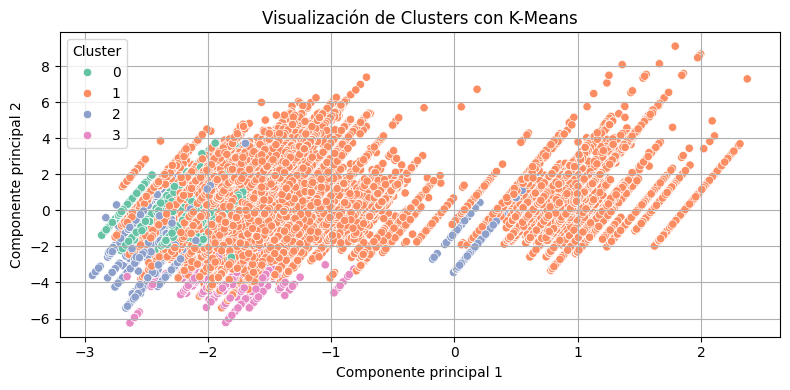

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset_vehiculos_limpio.csv")

variables_riesgo = [
    'antiguedad', 'TRD0803', 'TRD0503', 'TRD0401', 'TRD0601',
    'TRD0804', 'TRD0502', 'TRD0901', 'TRD0403', 'TRD0202',
    'TRD0302', 'TRD0603', 'TRD0405', 'TRD0704', 'TRD1006'
]

tipo_vehiculo_cols = [col for col in df.columns if col.startswith("TRVTIPVE_")]
tipo_inspeccion_col = ['TRVPROSE_SEGUNDA Y SUCESIVAS']  # si est√° como True/False


df_segmentacion = df[variables_riesgo + tipo_vehiculo_cols + tipo_inspeccion_col].copy()

df_segmentacion = df_segmentacion.astype(int)


df_segmentacion.fillna(0, inplace=True)


scaler = StandardScaler()
datos_norm = scaler.fit_transform(df_segmentacion)

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(datos_norm)

# PCA
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(datos_norm)
df['PCA1'] = pca_coords[:, 0]
df['PCA2'] = pca_coords[:, 1]

# Gr√°fico
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Visualizaci√≥n de Clusters con K-Means")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

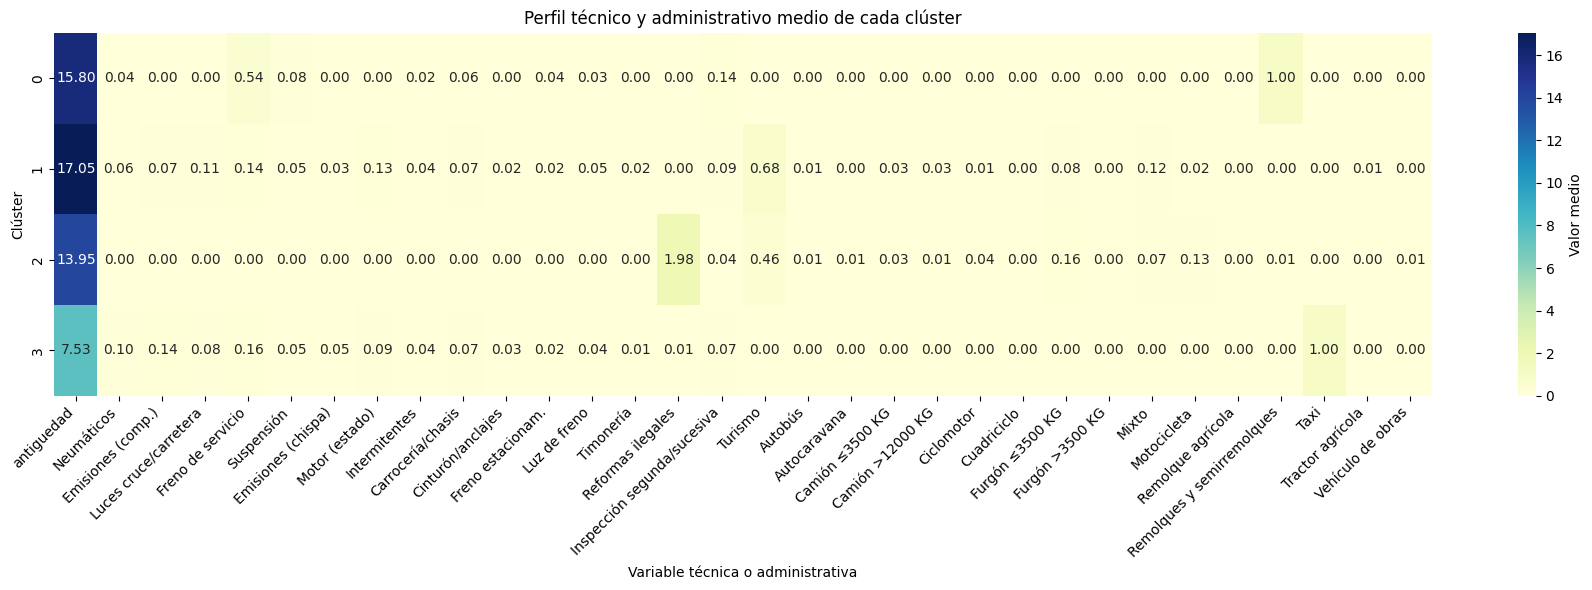

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_extra = [
    'TRVPROSE_SEGUNDA Y SUCESIVAS',
    'TRVTIPVE_TURISMO', 'TRVTIPVE_AUTOBUS', 'TRVTIPVE_AUTOCARAVANA',
    'TRVTIPVE_CAMION<=3500 KG', 'TRVTIPVE_CAMION>12000 KG', 'TRVTIPVE_CICLOMOTOR',
    'TRVTIPVE_CUADRICICLO', 'TRVTIPVE_FURGON<=3500 KG', 'TRVTIPVE_FURGON>3500 KG',
    'TRVTIPVE_MIXTO', 'TRVTIPVE_MOTOCICLETA', 'TRVTIPVE_REMOLQUE AGRICOLA',
    'TRVTIPVE_REMOLQUES Y SEMIRREMOLQUES', 'TRVTIPVE_TAXI', 'TRVTIPVE_TRACTOR AGRICOLA',
    'TRVTIPVE_VEHICULO OBRAS'
]

nombres_extra = {
    'TRVPROSE_SEGUNDA Y SUCESIVAS': 'Inspecci√≥n segunda/sucesiva',
    'TRVTIPVE_TURISMO': 'Turismo', 'TRVTIPVE_AUTOBUS': 'Autob√∫s',
    'TRVTIPVE_AUTOCARAVANA': 'Autocaravana', 'TRVTIPVE_CAMION<=3500 KG': 'Cami√≥n ‚â§3500 KG',
    'TRVTIPVE_CAMION>12000 KG': 'Cami√≥n >12000 KG', 'TRVTIPVE_CICLOMOTOR': 'Ciclomotor',
    'TRVTIPVE_CUADRICICLO': 'Cuadriciclo', 'TRVTIPVE_FURGON<=3500 KG': 'Furg√≥n ‚â§3500 KG',
    'TRVTIPVE_FURGON>3500 KG': 'Furg√≥n >3500 KG', 'TRVTIPVE_MIXTO': 'Mixto',
    'TRVTIPVE_MOTOCICLETA': 'Motocicleta', 'TRVTIPVE_REMOLQUE AGRICOLA': 'Remolque agr√≠cola',
    'TRVTIPVE_REMOLQUES Y SEMIRREMOLQUES': 'Remolques y semirremolques',
    'TRVTIPVE_TAXI': 'Taxi', 'TRVTIPVE_TRACTOR AGRICOLA': 'Tractor agr√≠cola',
    'TRVTIPVE_VEHICULO OBRAS': 'Veh√≠culo de obras'
}


todas_las_variables = variables_riesgo + variables_extra


perfil_completo = df.groupby('Cluster')[todas_las_variables].mean()


nombres_finales = {**nombre_variables, **nombres_extra}
perfil_completo.rename(columns=nombres_finales, inplace=True)

# Gr√°fico
plt.figure(figsize=(18, 6))
sns.heatmap(perfil_completo, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Valor medio'})
plt.title("Perfil t√©cnico y administrativo medio de cada cl√∫ster")
plt.ylabel("Cl√∫ster")
plt.xlabel("Variable t√©cnica o administrativa")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

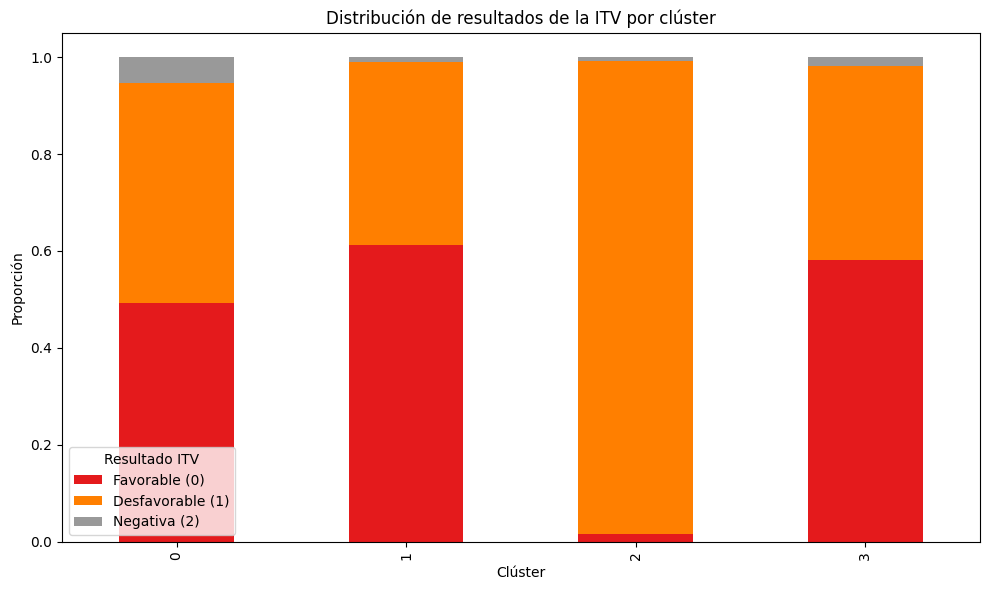

In [17]:
# Distribuci√≥n de resultados ITV por cl√∫ster
itv_por_cluster = df.groupby('Cluster')['target'].value_counts(normalize=True).unstack().fillna(0)

itv_por_cluster.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set1')
plt.title("Distribuci√≥n de resultados de la ITV por cl√∫ster")
plt.xlabel("Cl√∫ster")
plt.ylabel("Proporci√≥n")
plt.legend(title="Resultado ITV", labels=['Favorable (0)', 'Desfavorable (1)', 'Negativa (2)'])
plt.tight_layout()
plt.show()

In [19]:
print(df['Cluster'].value_counts().sort_index())

Cluster
0      6640
1    298811
2      1488
3       859
Name: count, dtype: int64
